## Data Science 100 Group Project: Classification of 

In [102]:
## load packages
library(tidyverse)
library(tidymodels)
library(forcats)

In [103]:
## read data
heart_disease_data <- read_csv("data/processed.cleveland.data", col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [108]:
## Filter data and select data so there's no N/A observations in the predictor variables
disease_factor <- factor(c("absence", "small presence", "presence", "strong presence", "strongest presence"))

heart_disease_data_filtered <- filter(heart_disease_data, age != "?", chol != "?", trestbps != "?",  thalach != "?", num != "?") |>
    select(age, chol, trestbps, thalach, num) |>
    mutate(presence = case_when(num == 0 ~ "absence",
                                num == 1 ~ "small presence",
                                num == 2 ~ "presence",
                                num == 3 ~ "strong presence",
                                num == 4 ~ "strongest presence")) |>
    mutate(presence = as.factor(presence)) |>
    fct_relevel(presence, disease_factor)

heart_disease_data_filtered

ERROR: Error: `f` must be a factor (or character vector).


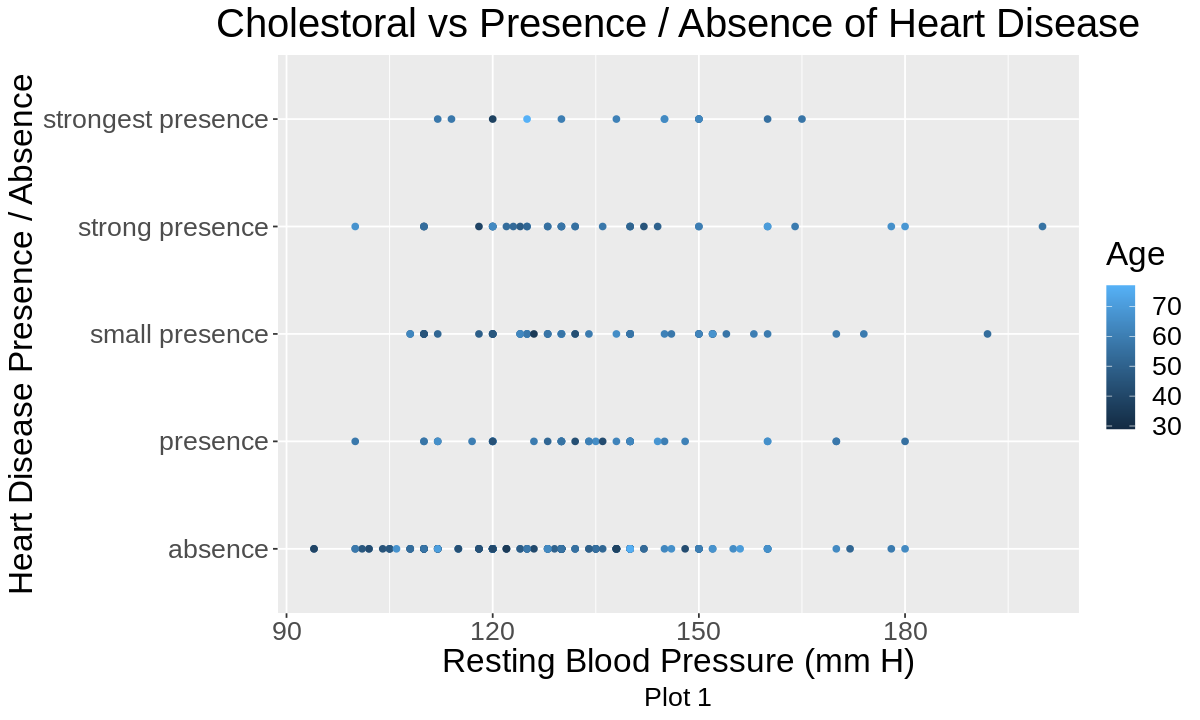

In [88]:
## plot
options(repr.plot.width=10, repr.plot.height=6)

heart_disease_data_filtered |>  
    ggplot(aes(x=trestbps, 
               y= presence, 
               colour = age)) +
        labs(x = "Resting Blood Pressure (mm H)",
             y = "Heart Disease Presence / Absence",
             title = "Cholestoral vs Presence / Absence of Heart Disease", 
            colour = 'Age',
            caption = "Plot 1") +
        geom_point() +
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


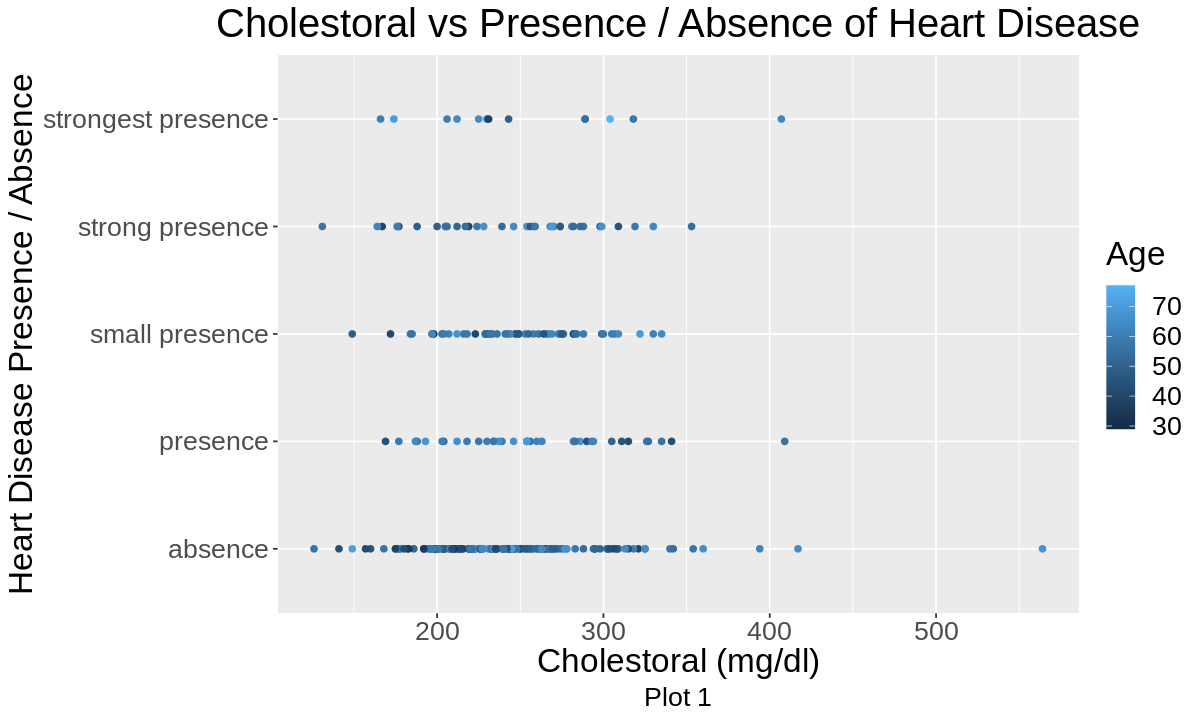

In [89]:
## plot
options(repr.plot.width=10, repr.plot.height=6)

heart_disease_data_filtered |>  
    ggplot(aes(x=chol, 
               y= presence, 
               colour = age)) +
        labs(x = "Cholestoral (mg/dl)",
             y = "Heart Disease Presence / Absence",
             title = "Cholestoral vs Presence / Absence of Heart Disease", 
            colour = 'Age',
            caption = "Plot 1") +
        geom_point() +
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [101]:
?fct_relevel

fct_relevel {forcats},R Documentation
.f,A factor (or character vector).
...,"Either a function (or formula), or character levels. A function will be called with the current levels, and the return value (which must be a character vector) will be used to relevel the function. Any levels not mentioned will be left in their existing order, after the explicitly mentioned levels. Supports tidy dots."
after,Where should the new values be placed?
